In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from hypnn.hypergraph import Hypergraph
from hypnn.gui.mpldraw import MplHypergraph

In [3]:
g = Hypergraph()
for _ in range(10):
    g.add_vertex(Hypergraph.create_vertex())
g.add_edge(Hypergraph.create_edge([0, 1, 2], [3, 4], 'f'))
g.add_edge(Hypergraph.create_edge([3, 4], [5, 6, 7], 'g'))
g.inputs = [0, 1, 2, 8, 9]
g.outputs = [5, 6, 7, 8, 9]
g

f ; g ; 
id; id; 
id; id; 

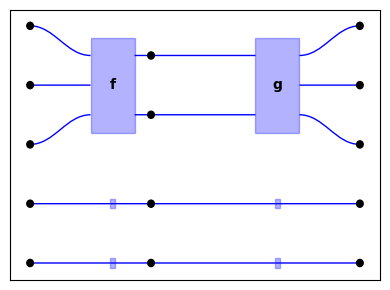

In [4]:
g_mpl = MplHypergraph(g)
g_mpl.draw(figsize=(4, 3))

In [5]:
h = Hypergraph()
for _ in range(7):
    h.add_vertex(Hypergraph.create_vertex())
h.add_edge(Hypergraph.create_edge([2, 3, 4], [5, 6], 'h'))
h.inputs = [0, 1, 2, 3, 4]; h.outputs = [0, 5, 6, 1]
h

id; 
id; 
h ; 

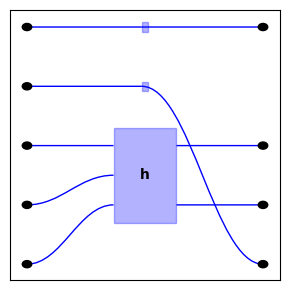

In [6]:
h_mpl = MplHypergraph(h)
h_mpl.draw(figsize=(3, 3))

In [7]:
gh = g.sequential_comp(h)
gh

f ; g ; id; 
id; id; id; 
id; id; h ; 

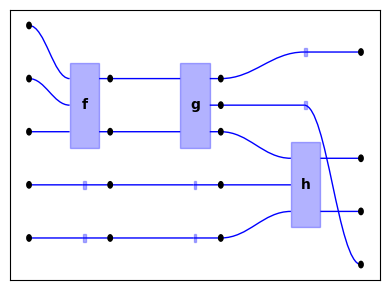

In [8]:
gh_mpl = MplHypergraph(gh)
gh_mpl.draw(figsize=(4, 3))

In [9]:
gh_g = gh.parallel_comp(g)
gh_g

f ; g ; id; 
id; id; id; 
id; id; h ; 
f ; g ; id; 
id; id; id; 
id; id; id; 
  ;   ; id; 
  ;   ; id; 

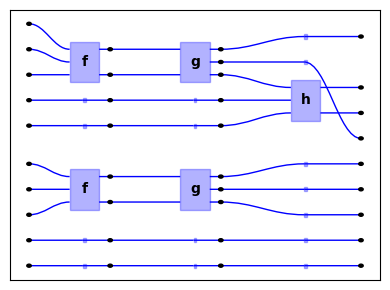

In [10]:
gh_g_mpl = MplHypergraph(gh_g)
gh_g_mpl.draw(figsize=(4, 3))

In [11]:
stress_test = Hypergraph()
for _ in range(18):
    stress_test.add_vertex(Hypergraph.create_vertex())
stress_test.add_edge(Hypergraph.create_edge([0, 1, 2], [3, 12, 16, 4], 'f'))
stress_test.add_edge(Hypergraph.create_edge([6, 13, 5, 9, 14], [11, 10], 'g'))
stress_test.add_edge(Hypergraph.create_edge([4, 3, 15, 8], [5, 6, 7], 'h'))
stress_test.add_edge(Hypergraph.create_edge([12], [], 'e1'))
stress_test.add_edge(Hypergraph.create_edge([16, 17], [], 'e2'))
stress_test.add_edge(Hypergraph.create_edge([], [13, 17, 14], 's1'))
stress_test.add_edge(Hypergraph.create_edge([], [15], 's2'))
stress_test.inputs = [2, 9, 8, 0, 1]
stress_test.outputs = [10, 7, 11]
stress_test

s1; id; g ; 
f ; e2; id; 
id; e1;   ; 
s2; id;   ; 
id; id;   ; 
  ; h ;   ; 

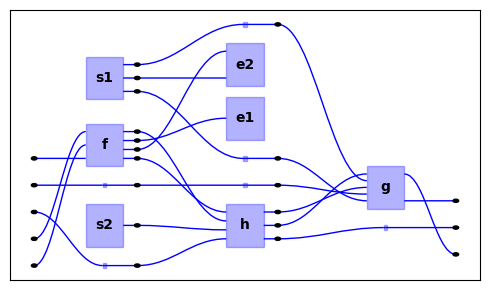

In [12]:
stress_test_mpl = MplHypergraph(stress_test)
stress_test_mpl.draw(figsize=(5, 3))